# Example notebook for Python (Data Mine Lecture)
Shengchao Li

Aug.29,2022

In [1]:
"This is a cell" #things after # does not show

'This is a cell'

In [2]:
a=1
b=2

In [ ]:
a+b+

## Import

In [2]:
import copy

import numpy as np #a Python library used for working with arrays
import pandas as pd #data manipulation and analysis
from numba import njit #High Performance Python Compiler

import matplotlib.pyplot as plt    #cool civualization tool
from matplotlib.colors import LogNorm, Normalize
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d, Axes3D

from scipy import stats, interpolate, optimize #math stuff


In [3]:
#ML tools
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm

import keras
import torch

Using TensorFlow backend.


## Load data

In [4]:
#load AmBe data
filename='/depot/darkmatter/data/xenonnt/AmBe/_ambe_bottom_cw11d2m-yqoqgyttzr.npy'
df=pd.DataFrame(np.load(filename))

In [5]:
df.head()

,time,endtime,cut_ambe_s2_area,cut_cs2_area_fraction_top,cut_daq_veto,cut_fiducial_volume_ambe,cut_interaction_exists,cut_main_is_valid_triggering_peak,cut_nv_tpc_coincidence_ambe,cut_run_boundaries,...,z_field_distortion_correction,theta,s1_ln_prob_s1,s1_ln_prob_s2,s2_ln_prob_s1,s2_ln_prob_s2,alt_s1_ln_prob_s1,alt_s1_ln_prob_s2,alt_s2_ln_prob_s1,alt_s2_ln_prob_s2
0,1622045642016468796,1622045642019382010,True,True,True,True,True,True,False,False,...,0.221205,-0.055776,-72.254280,0.000000,-433.697083,0.0,NaN,NaN,-566.929932,0.0
1,1622045642056240666,1622045642059058890,False,True,False,False,False,True,False,False,...,NaN,-0.937688,NaN,NaN,-305.882782,0.0,NaN,NaN,-357.770172,0.0
2,1622045642296410516,1622045642299635590,True,True,True,True,True,True,False,False,...,0.421038,-0.371596,0.000000,-79.099480,-664.568237,0.0,NaN,NaN,-738.458313,0.0
3,1622045642453336136,1622045642456221680,True,True,True,False,True,True,False,False,...,0.339806,0.031261,-0.014675,-4.228932,-501.479767,0.0,NaN,NaN,-584.046082,0.0
4,1622045642526580696,1622045642529870130,True,True,True,False,True,True,False,False,...,0.000000,-2.722146,0.000000,-30.788820,-458.738586,0.0,NaN,NaN,-274.332092,0.0


In [6]:
df.keys()

Index(['time', 'endtime', 'cut_ambe_s2_area', 'cut_cs2_area_fraction_top',
       'cut_daq_veto', 'cut_fiducial_volume_ambe', 'cut_interaction_exists',
       'cut_main_is_valid_triggering_peak', 'cut_nv_tpc_coincidence_ambe',
       'cut_run_boundaries',
       ...
       'z_field_distortion_correction', 'theta', 's1_ln_prob_s1',
       's1_ln_prob_s2', 's2_ln_prob_s1', 's2_ln_prob_s2', 'alt_s1_ln_prob_s1',
       'alt_s1_ln_prob_s2', 'alt_s2_ln_prob_s1', 'alt_s2_ln_prob_s2'],
      dtype='object', length=145)

In [7]:
# for key in df:
#     print(key)

It's easy to make new variables

In [8]:
df['log_cs2']=np.log10(df.cs2) #save log(cs2) as a new column in the data frame
df.log_cs2

0         5.641884
1              NaN
2         5.068304
3         5.991668
4         4.917884
            ...   
693457    5.240570
693458    5.893124
693459    5.423334
693460    6.134698
693461    5.111898
Name: log_cs2, Length: 693462, dtype: float32

## How to make cuts and selections



In [9]:
#use query
data_good_recon = df.query('cut_s2_recon_pos_diff == 1')

In [10]:
#use dataframe logic
data_good_recon = df[df.cut_s2_recon_pos_diff==1]

In [11]:
#it can be a >,< statement
data_upper_tpc = df[df['z']>-50] 

In [12]:
#selection can be complicated
mask=((df['cut_cs2_area_fraction_top'])
                &(df['cut_daq_veto'])
                &(df['cut_main_is_valid_triggering_peak'])
                &(df['cut_interaction_exists'])
                &(df['cut_run_boundaries'])
                &(df['cut_s1_area_fraction_top'])
                &(df['cut_s1_max_pmt'])
                &(df['cut_s1_pattern_bottom'])
                &(df['cut_s1_pattern_top'])
                &(df['cut_s1_single_scatter'])
                &(df['cut_s1_width'])
                &(df['cut_s2_pattern'])
                &(df['cut_s2_recon_pos_diff'])
                &(df['cut_s2_single_scatter'])
                &(df['cut_nv_tpc_coincidence_ambe']))


In [13]:
mask[:5]

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [14]:
data_sel=df[mask]

## Making plots

Now that we can make selections, let us make some plots! 
First let's make a simple sin function from scratch.

In [15]:
x_list = np.linspace(0,5,200) #x from 0 to 5, has 200 bins
y_list = [] #empty list to store y
for x in x_list: #x is a local var
    y = np.sin(10*x)
    y_list.append(y)
'''
numpy can actually handle inputs of an array, so it can simplify to y_list=np.sin(10*x_list)
'''

'\nnumpy can actually handle inputs of an array, so it can simplify to y_list=np.sin(10*x_list)\n'

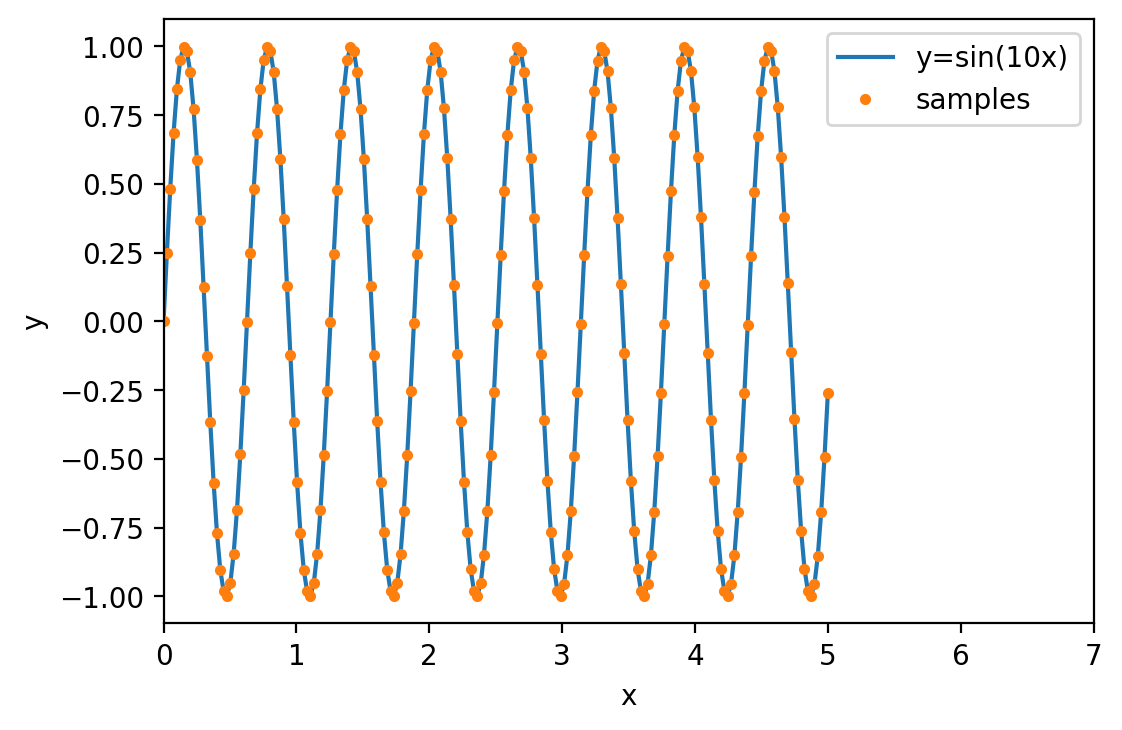

In [16]:
#now we plot them
fig = plt.figure(figsize=(6, 4), dpi=200)
plt.plot(x_list,y_list,label='y=sin(10x)') #defalt to use lines to connect dots
plt.plot(x_list,y_list,'.',label='samples') #look at what is actually in x_list, y_list
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(0,7)
plt.legend() #to show legend
plt.show()

Making 2D histograms are also quite simple in matplotlib.

What we usually do is to visualize the distribution of data in 2D space

In [17]:
data_sel[['cs1','cs2']].head()

,cs1,cs2
15,81.139870,2929.298584
54,8342.877930,420286.656250
59,3147.030273,102041.726562
63,4776.519531,188211.031250
69,8168.245117,279603.468750


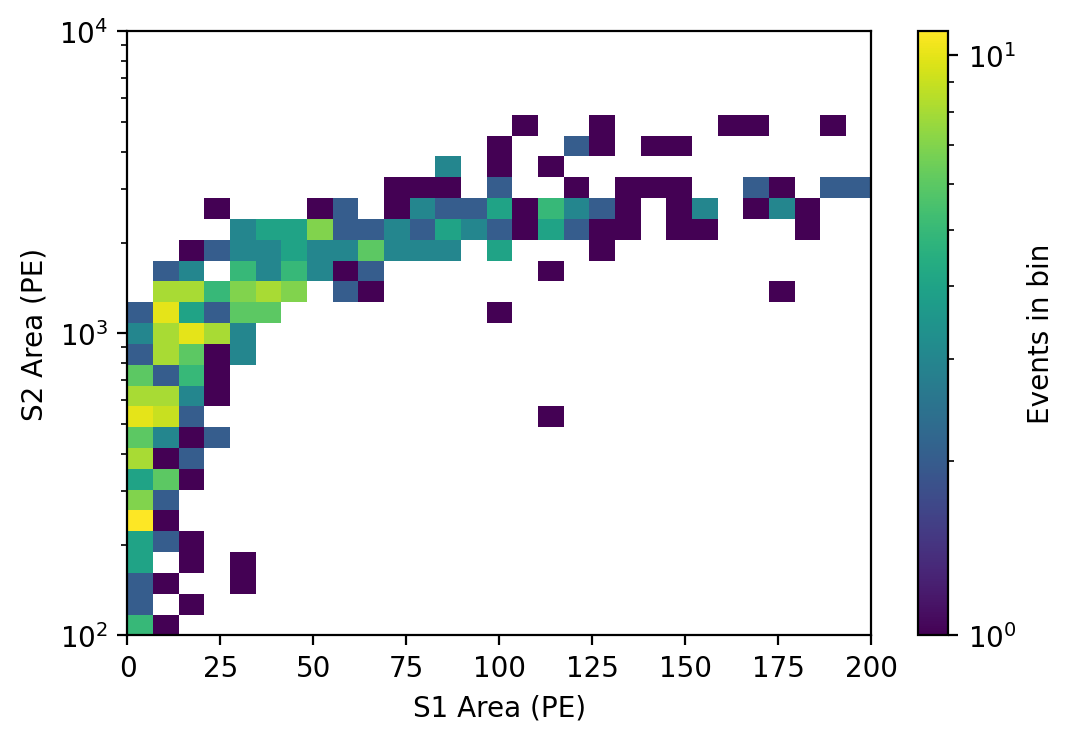

In [18]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)
x = data_sel['cs1']
y = data_sel['cs2']
_,_,_,h = ax.hist2d(x,y,bins=[np.linspace(0,200,30),np.logspace(2,4,30)], norm=LogNorm(), 
                    cmap='viridis')
ax.set(xscale='linear', yscale='log', xlabel='S1 Area (PE)', ylabel='S2 Area (PE)')

c = plt.colorbar(h)
c.set_label('Events in bin')

plt.show()

Choose the right bin size!!

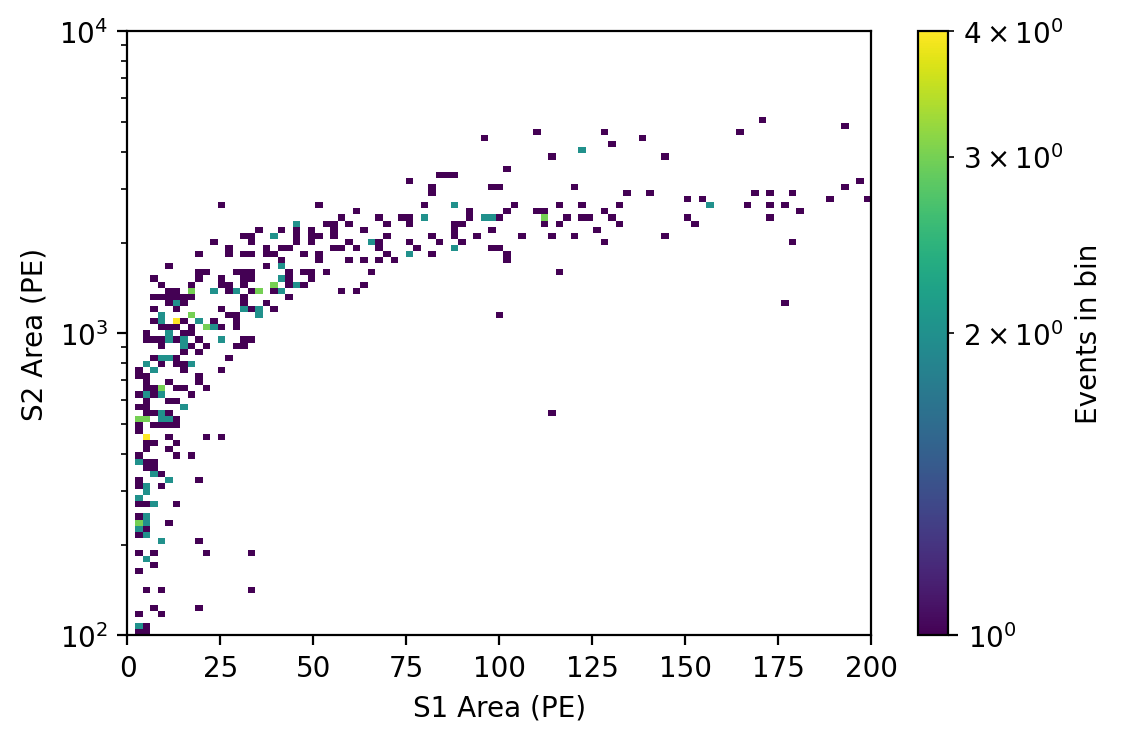

In [19]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)
x = data_sel['cs1']
y = data_sel['cs2']
_,_,_,h = ax.hist2d(x,y,bins=[np.linspace(0,200,100),np.logspace(2,4,100)], norm=LogNorm(), cmap='viridis')
ax.set(xscale='linear', yscale='log', xlabel='S1 Area (PE)', ylabel='S2 Area (PE)')

c = plt.colorbar(h)
c.set_label('Events in bin')

plt.show()

One issue with the defaults is that empty bins are shown as white. This might be misleading in some cases. This can be changed with the set_bad method:

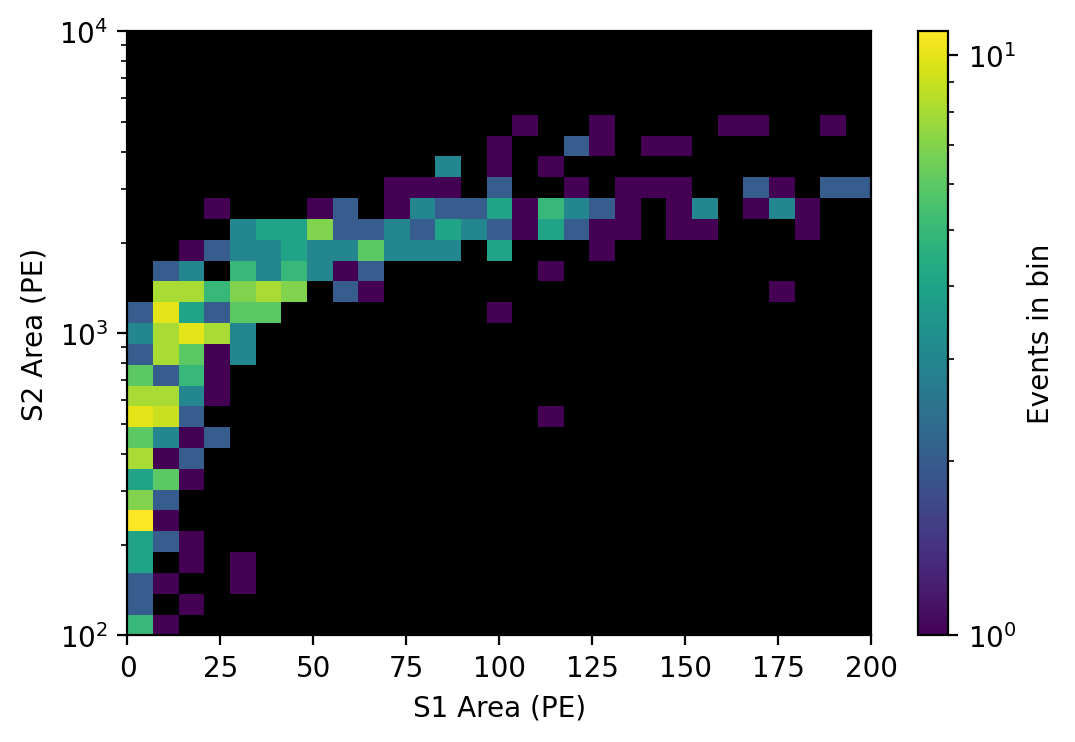

In [20]:
my_cmap = copy.copy(cm.get_cmap('viridis'))
my_cmap.set_bad((0,0,0))

fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)
x = data_sel['cs1']
y = data_sel['cs2']
_,_,_,h = ax.hist2d(x,y,bins=[np.linspace(0,200,30),np.logspace(2,4,30)], norm=LogNorm(), cmap=my_cmap)
ax.set(xscale='linear', yscale='log', xlabel='S1 Area (PE)', ylabel='S2 Area (PE)')

c = plt.colorbar(h)
c.set_label('Events in bin')

plt.show()

Here, we used the colourmap 'viridis'. There is a broad selection in matplotlib. However, [not all colormaps are equal!](https://matplotlib.org/stable/tutorials/colors/colormaps.html) For example, using the wrong colormap can make a plot very misleading at first glance:

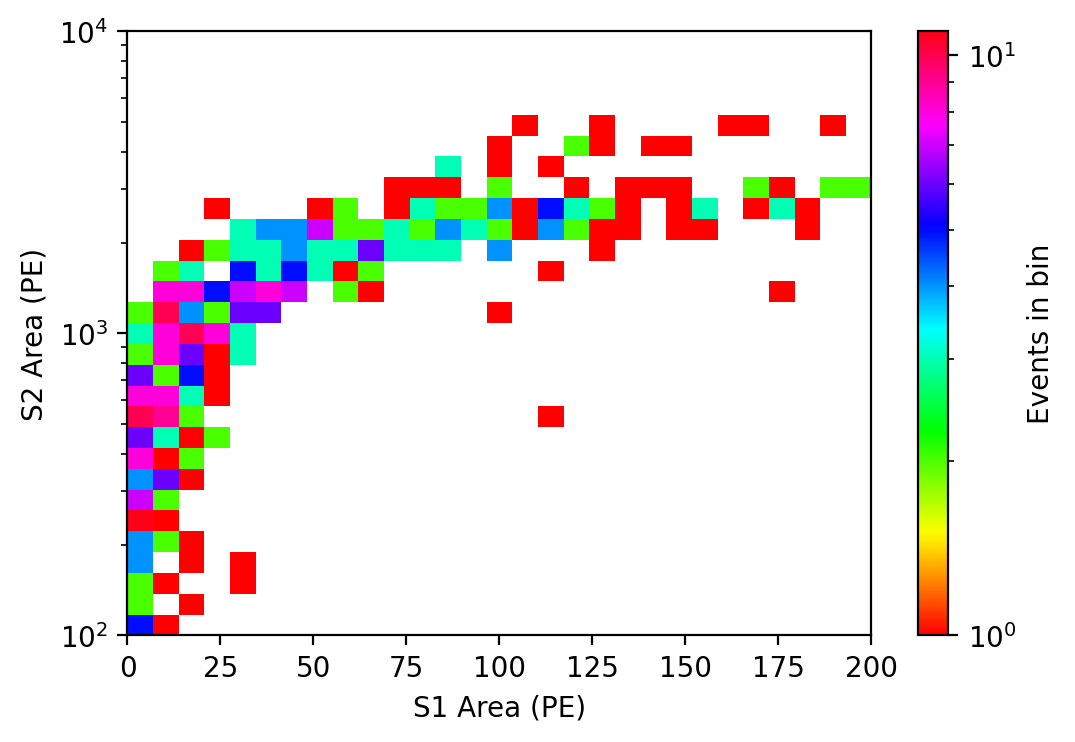

In [21]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)
x = data_sel['cs1']
y = data_sel['cs2']
_,_,_,h = ax.hist2d(x,y,bins=[np.linspace(0,200,30),np.logspace(2,4,30)], norm=LogNorm(), cmap='hsv')
ax.set(xscale='linear', yscale='log', xlabel='S1 Area (PE)', ylabel='S2 Area (PE)')#, title='Do not use color map like this')

c = plt.colorbar(h)
c.set_label('Events in bin')

plt.show()

## Getting help: function manual

In [22]:
help(ax.step)

Help on method step in module matplotlib.axes._axes:

step(x, y, *args, where='pre', data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Make a step plot.
    
    Call signatures::
    
        step(x, y, [fmt], *, data=None, where='pre', **kwargs)
        step(x, y, [fmt], x2, y2, [fmt2], ..., *, where='pre', **kwargs)
    
    This is just a thin wrapper around `.plot` which changes some
    formatting options. Most of the concepts and parameters of plot can be
    used here as well.
    
    .. note::
    
        This method uses a standard plot with a step drawstyle: The *x*
        values are the reference positions and steps extend left/right/both
        directions depending on *where*.
    
        For the common case where you know the values and edges of the
        steps, use `~.Axes.stairs` instead.
    
    Parameters
    ----------
    x : array-like
        1D sequence of x positions. It is assumed, but not checked, that
        it is unif

In [23]:
# ax.step( 'press shift + tab here') 

## ADVANCED (skipped in lecture)
Below, I make a simple histogram, demonstrating the use of log axes.

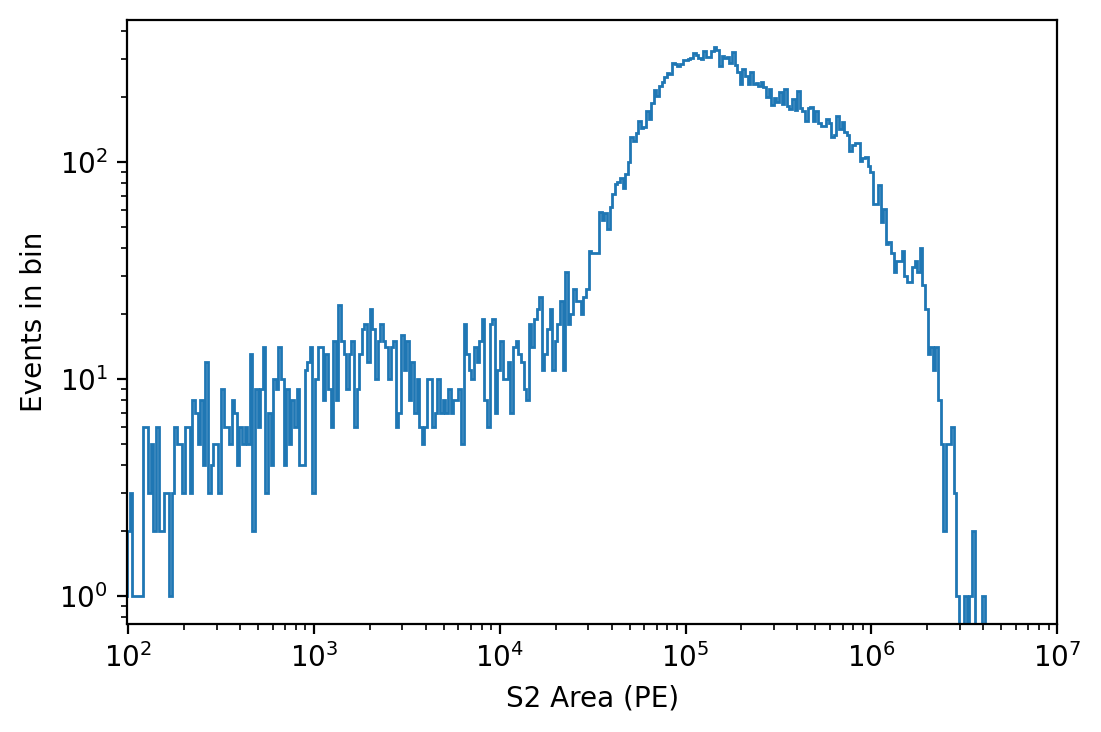

In [24]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)
ax.hist(data_sel['cs2'], bins=np.logspace(1,8,500), histtype='step')
ax.set(yscale='log', xscale='log')
plt.ylabel("Events in bin")
plt.xlabel("S2 Area (PE)")
plt.xlim(99,1e7)
plt.show()

One downside of using log x-axes in a histogram is that the histogram bins are uneven, which means bin height is no longer a reflection of the density of events at a given position. Depending on the application, this may be undesirable. This can be circumvented by making the histogram using numpy and dividing the bin height by bin width:

In [25]:
hist_arr = np.histogram(data_sel['cs2'], bins=np.logspace(1,8,500))
widths = np.diff(hist_arr[1])
normalized_hist=hist_arr[0]/widths

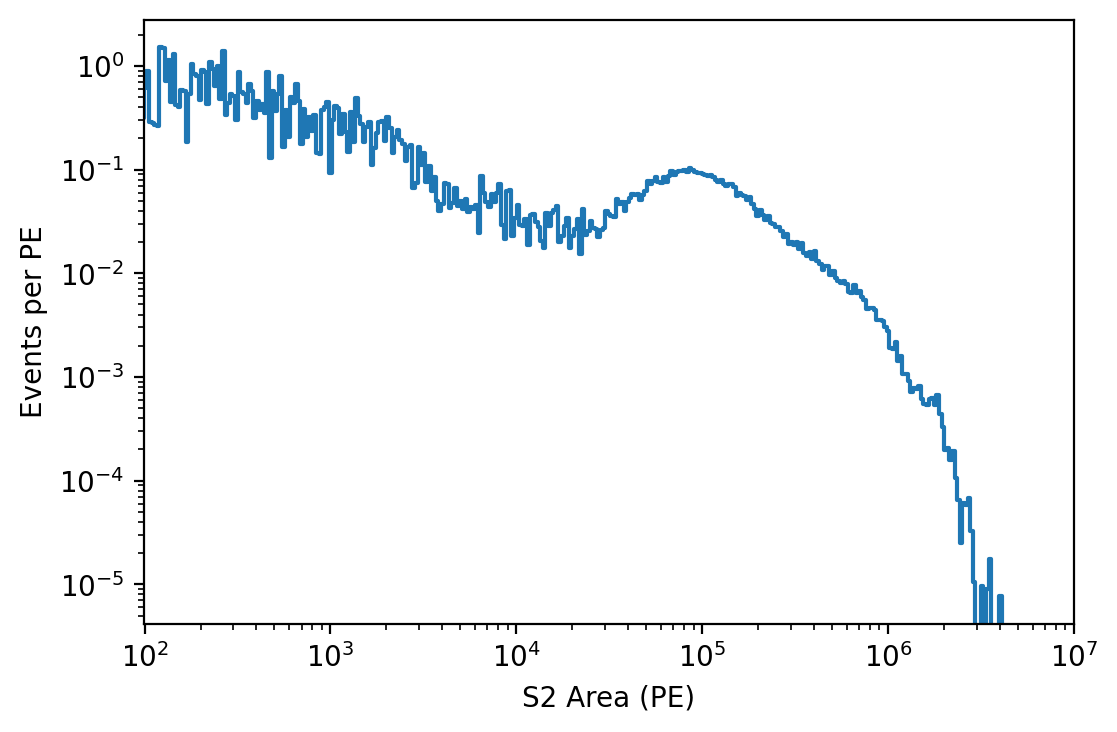

In [26]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)
ax.step(hist_arr[1][1:], normalized_hist)
#ax.hist(data_sel['cs2'], bins=np.logspace(1,8,500), histtype='step')
ax.set(xscale='log', yscale='log')
plt.ylabel("Events per PE")
plt.xlabel("S2 Area (PE)")
plt.xlim(99,1e7)
plt.show()